In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('imdb_data_cleaned.csv')

In [4]:
df.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121.0,8.1,585792.75,271.04875,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124.0,7.0,485820.00,126.46000,65.0
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117.0,7.3,157606.00,138.12000,62.0
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108.0,7.2,60545.00,270.32000,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123.0,6.2,393727.00,271.04875,40.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               838 non-null    object 
 1   Genre               838 non-null    object 
 2   Description         838 non-null    object 
 3   Director            838 non-null    object 
 4   Actors              838 non-null    object 
 5   Year                838 non-null    int64  
 6   Runtime (Minutes)   838 non-null    float64
 7   Rating              838 non-null    float64
 8   Votes               838 non-null    float64
 9   Revenue (Millions)  838 non-null    float64
 10  Metascore           838 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 72.1+ KB


In [6]:
df.describe()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.00000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,2012.50716,114.406325,6.822912,184442.021181,77.477642,59.575179
std,3.17236,17.814000,0.846823,158781.065522,80.348410,16.952416
min,2006.00000,66.500000,4.500000,178.000000,0.000000,11.000000
25%,2010.00000,101.000000,6.300000,61276.500000,13.967500,47.000000
50%,2013.00000,112.000000,6.900000,136879.500000,48.150000,60.000000
75%,2015.00000,124.000000,7.500000,271083.000000,116.800000,72.000000
max,2016.00000,158.500000,9.000000,585792.750000,271.048750,100.000000


<AxesSubplot: xlabel='Revenue (Millions)', ylabel='Count'>

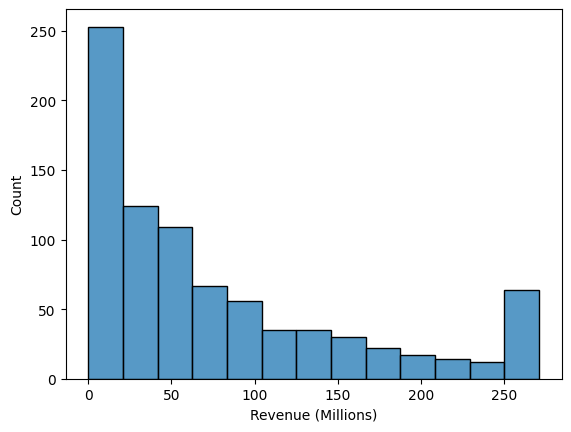

In [7]:
sns.histplot(data = df, x = 'Revenue (Millions)')

##### Insights:
- Revenue of most the film is mostly less than 50 millions. Almost 50% of the films earned below 50 millions.

#### Univariate analysis

In [8]:
# selecting numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float'])

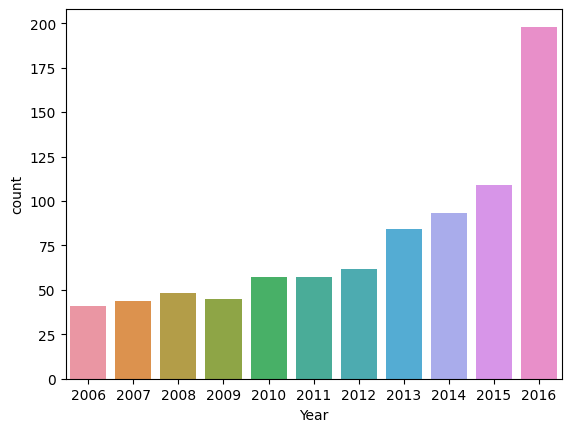

In [9]:
sns.countplot(x='Year', data = df)
plt.show()

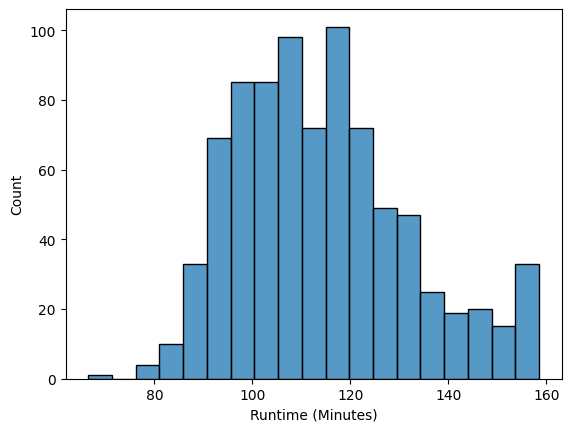

In [10]:
sns.histplot(x='Runtime (Minutes)', data = df)
plt.show()

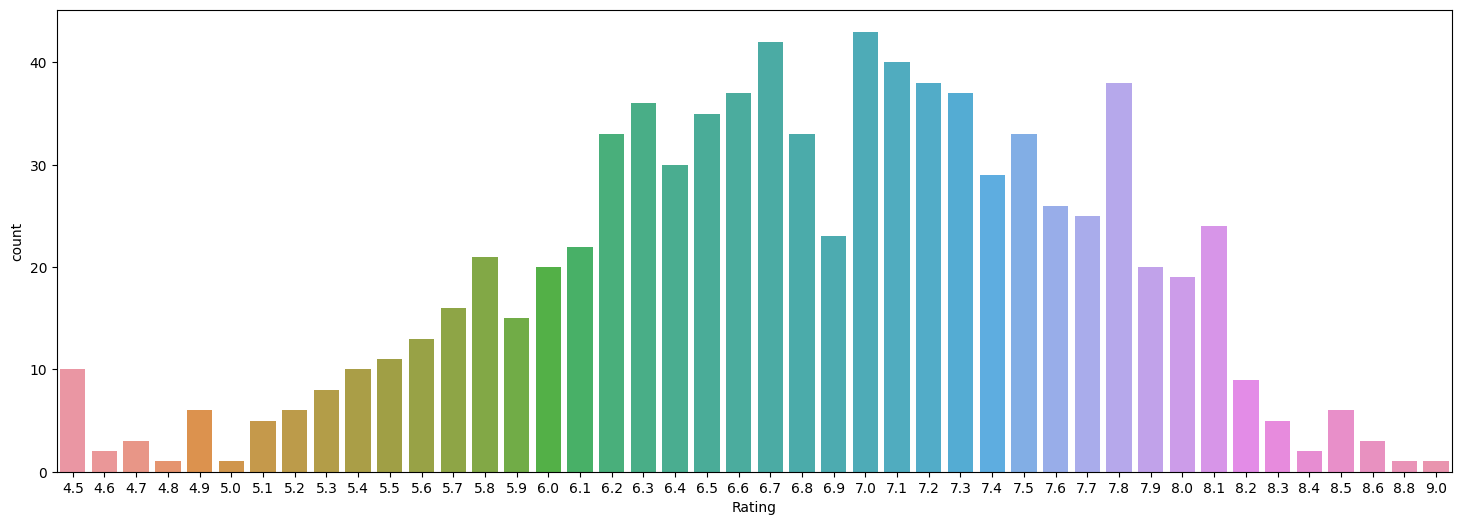

In [11]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.countplot(x='Rating', data = df, ax = ax)
plt.show()

##### Insights:
- It is evident that the year passess the number of film that release per year also increases. That result in more competition
- The distribution of Runtime is a normal distribution. From that it is visible that the most of the film the runtime is 100 to 120. Which is a engaging time for viewers.
- The distribution of Rating is also normal distribution. Only a very few films have more han 8.5 rating. Rating can increase the periods of film in the theatre are there by increases the revenue

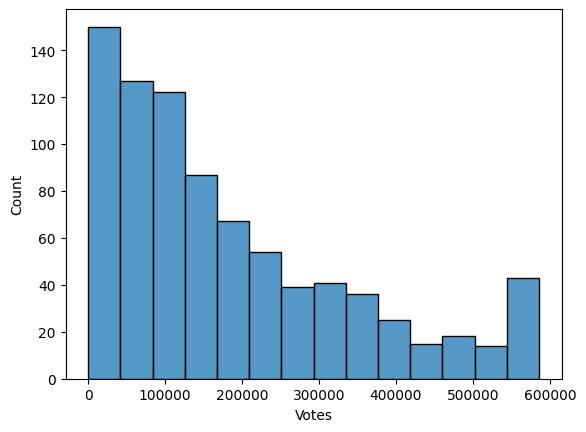

In [12]:
sns.histplot(x='Votes', data = df)
plt.show()

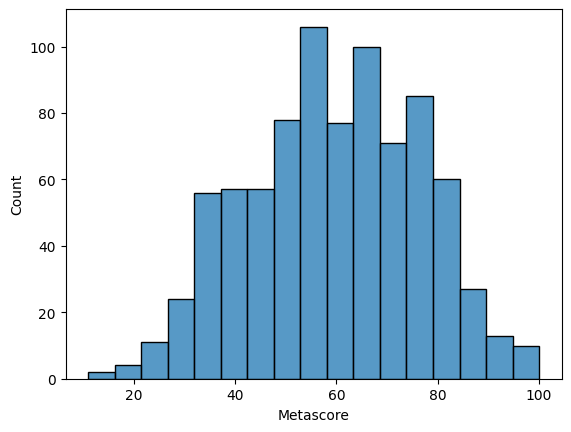

In [13]:
sns.histplot(x='Metascore', data = df)
plt.show()

##### Insights:
- The distribution of votes is right skewed. Half number of film have vote less than 10000. As the vote increases there maybe a chance to increase the Revenue

### bivariate analysis

In [14]:
year_group = df.groupby(['Year'])['Votes'].mean().sort_values(ascending=False)

In [18]:
year_group.head(11)

Year
2007    264837.676136
2012    262109.237903
2006    259420.225610
2011    259170.486842
2009    247512.400000
2010    238828.197368
2008    236386.380208
2013    221712.038690
2014    204575.422043
2015    128385.454128
2016     68225.680556
Name: Votes, dtype: float64

Text(0.5, 1.0, 'Votes per year')

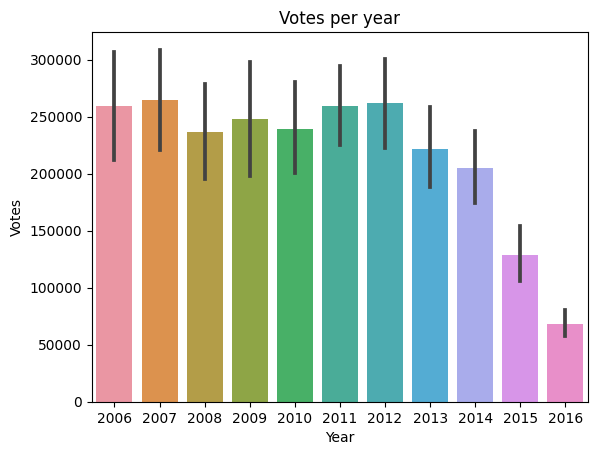

In [16]:
sns.barplot(x='Year', y='Votes', data=df)
plt.title("Votes per year")

##### insights:
- Vote of a paricular movie is increase as the time gone.
- The dataset is from 2016 so the recent year votes are less than other years.
- The average votes per year is 250000

In [31]:
df_tea = df.groupby('Year').size()

<AxesSubplot: xlabel='Year'>

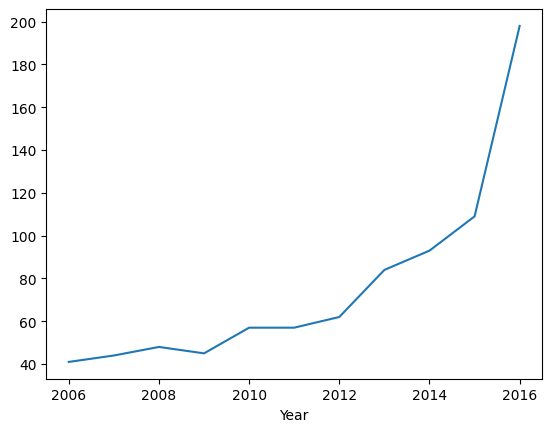

In [32]:
df_tea.plot()

Text(0.5, 1.0, 'Average revenue per year')

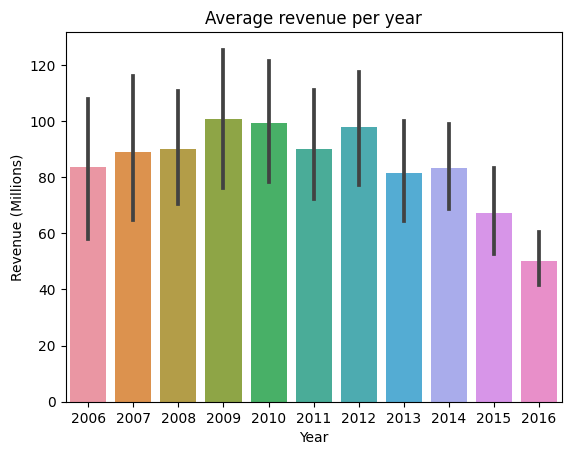

In [19]:
sns.barplot(x='Year', y='Revenue (Millions)', data=df)
plt.title('Average revenue per year')

In [36]:
revenue_per_year = df.groupby('Year')['Revenue (Millions)'].sum()

In [37]:
revenue_per_year

Year
2006    3425.49875
2007    3922.76500
2008    4325.73625
2009    4528.79375
2010    5666.64250
2011    5139.63625
2012    6073.61250
2013    6857.87250
2014    7738.12625
2015    7324.45125
2016    9923.12875
Name: Revenue (Millions), dtype: float64

<AxesSubplot: xlabel='Year'>

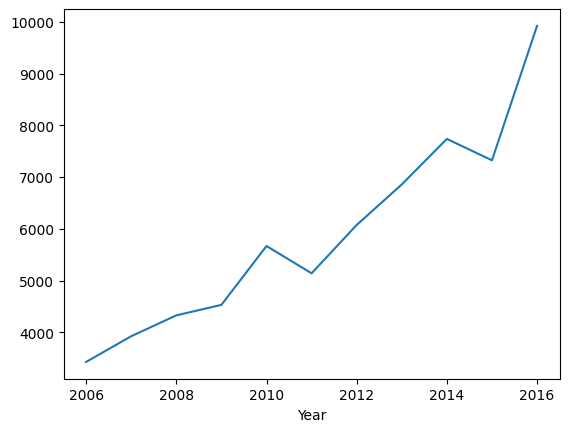

In [38]:
revenue_per_year.plot()

#### Insights:
- The average revenue of a films is mostly between 80 to 100.

Text(0.5, 1.0, 'Average revenue on rating')

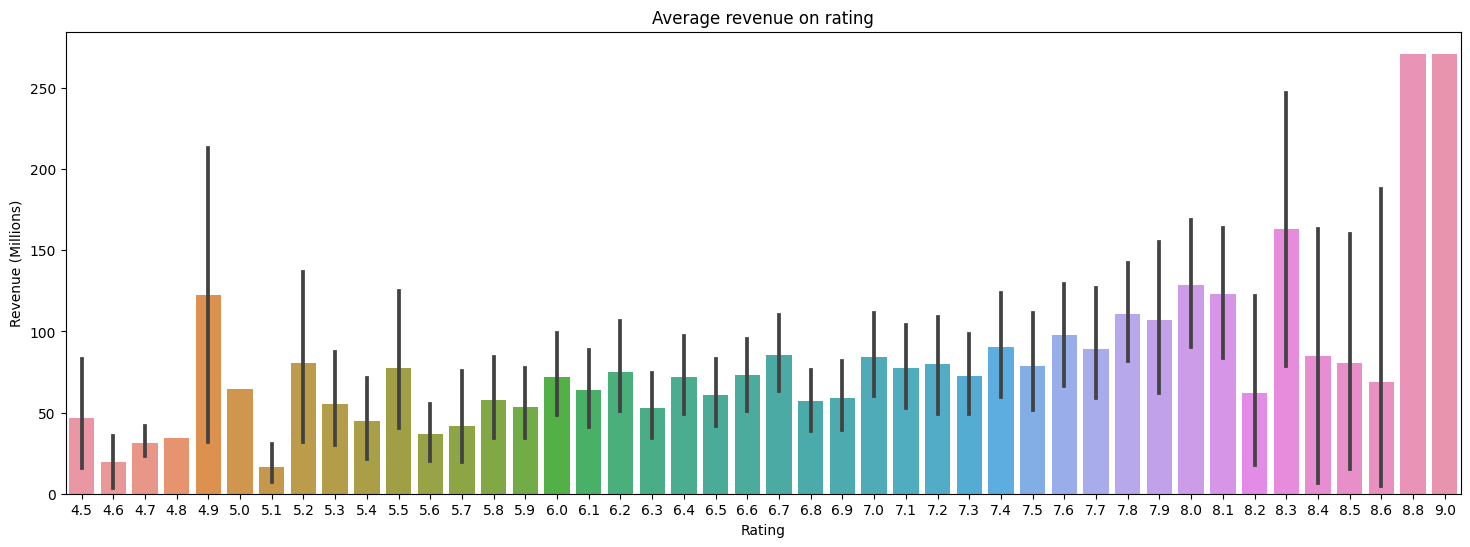

In [49]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='Rating', y='Revenue (Millions)', data=df)
plt.title('Average revenue on rating')

In [50]:
# Function for grouping films into 3 category depends on rating
def rating(rating):
    if rating >= 7.5:
        return 'Excellent'

    elif rating >= 6.0:
        return 'Good'
    else:
        return 'average'
    

In [51]:
df_rat = df

In [52]:
df_rat['Rating_cat'] = df_rat["Rating"].apply(rating)

Text(0.5, 1.0, 'Average revenue on Rating_cat')

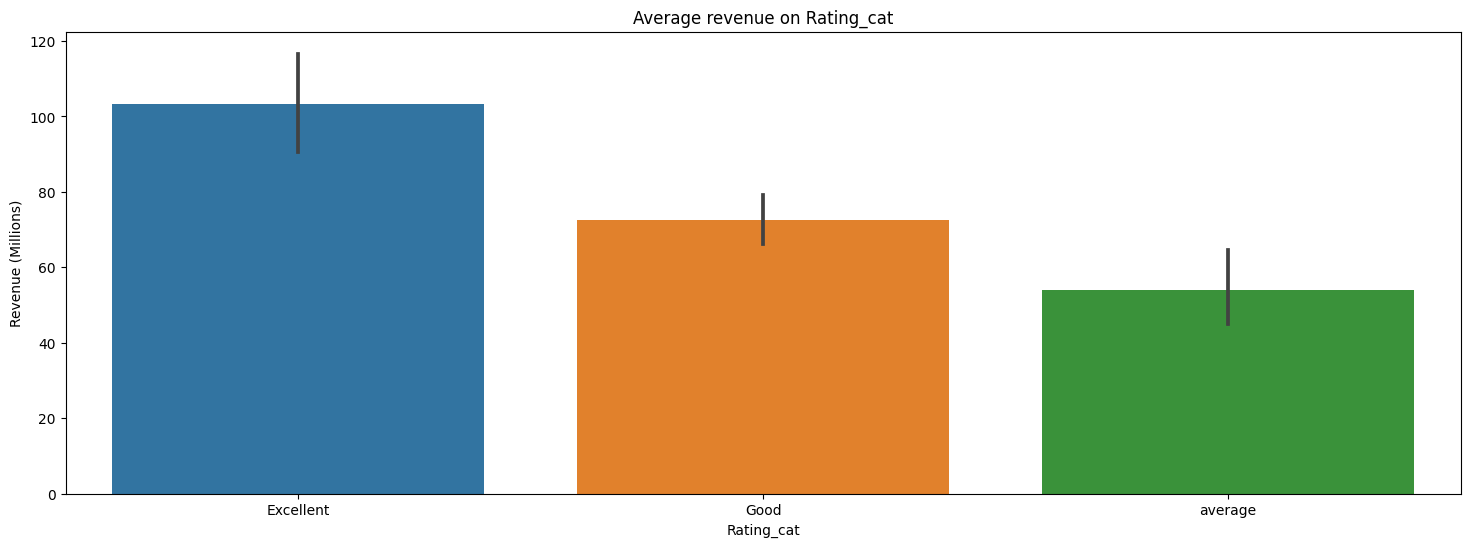

In [54]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='Rating_cat', y='Revenue (Millions)', data=df)
plt.title('Average revenue on Rating_cat')

#### Insights:
- The revenue of the movie is depends on the rating of the of movie.
- As the movie is excellent the average revenue is above 100 millions and good, average are above 70 and 60 respectively.

Text(0.5, 1.0, 'Average revenue on rating')

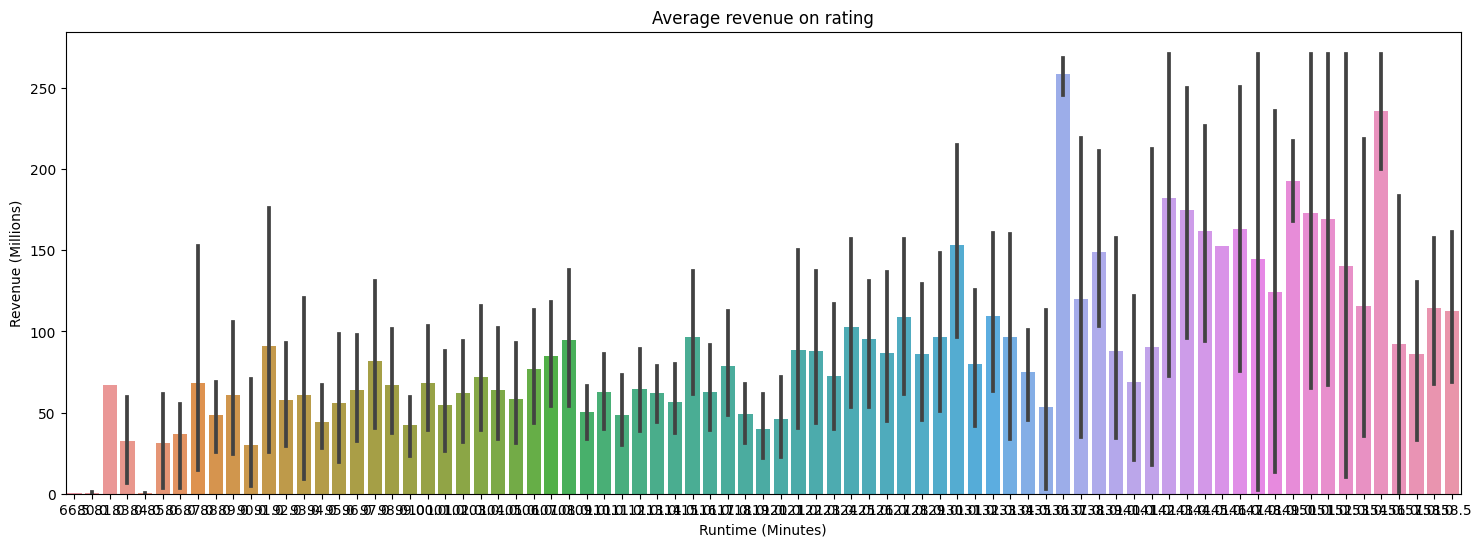

In [57]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x=df['Runtime (Minutes)'], y=df['Revenue (Millions)'], data=df)
plt.title('Average revenue on rating')

In [58]:
corr = df.corr()

<AxesSubplot: >

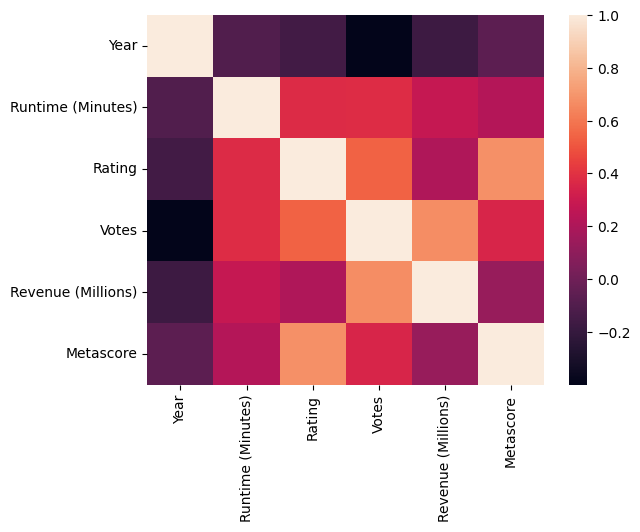

In [59]:
sns.heatmap(corr)